<a href="https://colab.research.google.com/github/Neelam1011/Practice-projects/blob/main/Us_News_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US election 2024 analysis based on news headlines
In this project we have gathered the data of news headlines which talks about the political news of US from the trusted sources as 'The economic times', 'CNN' and 'fox news'.

**Data collection** - We have collected the data by scraping it from the web pages. for that BeautifulSoup library of python has been used.

In [1]:
#importing required libraries
import requests
from bs4 import BeautifulSoup

In [2]:
eco_times = 'https://economictimes.indiatimes.com/news/international/us-elections-news/newslist/77101863.cms?from=mdr'
headers = {'User-Agent': 'Mozilla/5.0'}

response = requests.get(eco_times, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract headlines or article links
for article in soup.find_all('h3'):
    headline = article.text
    print(headline)

US Election 2024: Kamala Harris is promoting her resume and her goals rather than race as she courts Black voters
Trump campaign blasts NYT for 'blood and soil' label on Vance's ideology, calls headline 'disgusting'
Martha Stewart throws support behind 2024 Presidential candidate: Who's got her endorsement?
US Election 2024: Kamala Harris surges slightly in polls after debate, but Donald Trump remains a force in key states
Oregon DMV mistakenly registered more than 300 non-citizens to vote since 2021
'I don't control Laura': Trump calls Loomer a 'free spirit' after her racist remarks against Kamala Harris
Voting from the stars: How Sunita Williams and Butch Wilmore will participate in US Election 2024 from orbit
Will Taylor Swift's Harris endorsement influence the US elections?
Trump is right about World War III, wrong about the analysis
Trump or Harris: The next US president can't afford to drive off international students
'Comrade Kamala': Donald Trump paints Kamala Harris red in que

In [3]:

fox_news = 'https://www.foxnews.com/politics'

# Set a User-Agent to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Send a GET request to the URL
response = requests.get(fox_news, headers=headers)

# Check if the request was successful
if response.status_code == 200:

    soup = BeautifulSoup(response.content, 'html.parser')
    headlines = soup.find_all('h2', class_='title')

    # Extract and print each headline text
    for idx, headline in enumerate(headlines, start=1):
        headline_text = headline.text.strip()
        print(f"{idx}. {headline_text}")

else:
    print(f"Failed to retrieve content from Fox News. Status code: {response.status_code}")

1. Trump to hold first event since latest assassination attempt in key battleground
2. Watchdog group sues for NASA emails with ‘Space Czar’ Harris, Boeing as astronauts linger in orbit
3. China exerts new restrictions on exports of minerals critical to US weapons making
4. Presidential race rocked by 2nd assassination attempt with 50 days until election
5. Harris eyes endorsement in high-stakes meeting with only major union that hasn't endorsed her campaign


In [4]:
cnn = 'https://www.cnn.com/politics'
headers = {'User-Agent': 'Mozilla/5.0'}

response = requests.get(cnn, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

a = []

for article in soup.find_all('div', class_='stack'):
    headline2 = article.text.split(maxsplit=5)
    a.append(headline2)
    print(headline2)

print(a)


['Latest', 'Headlines', 'Win', 'McNamee/Getty', 'Images/File', 'Harris campaign sees opportunity to reach some male voters on reproductive rights\n\n\n\n\n\n\n\n\nUS military aid packages to Ukraine shrink amid concerns over Pentagon stockpiles\n\n\n\n\n\n\n\n\nFrom Ukraine to Hawaii, Trump assassination attempt suspect’s odd behavior suggested ‘delusion of grandeur’\n\n\n\n\n\n\n\n\nBiden’s national security team has no imminent plans to present an updated ceasefire proposal\n\n\n\n\n\n\n\n\nFormer Trump chief of staff loses bid to move Arizona election subversion case to federal court\n\n\n\n\n\n\n\n\nTrump launches another business full of potential risks and conflicts if he wins\n\n\n\n\n\n\n\n\n‘All of a sudden we heard shots’: Trump recounts apparent assassination attempt\n\n\n\n\n\n\n\n\nSuspect in apparent assassination attempt of Trump charged, may have been lying in wait for nearly 12 hours\n\n\n\n\n\n\n\n\n\n\n']
['Analysis', 'Scott', 'Olson/Getty', 'Images', 'Why', 'these t

In [5]:
import pandas as pd
df = pd.DataFrame(a)
df[5] = df[5].str.replace('\n', '')
df.columns = ['a', 'b', 'c', 'd', 'e', 'news']
df.drop(columns=['a', 'b', 'c', 'd', 'e'], inplace=True)
df

,news
0,Harris campaign sees opportunity to reach some...
1,these three states are the most consistent tip...
2,Video 3:31Clipped From VideoDo you reme...
3,John KingShow allMichael Le Brecht II/ABC News...
4,Snyder/ReutersFact-checking the ABC News presi...
5,Images/FileKFile: Harris told ACLU in 2019 she...


In [6]:
new_df = pd.DataFrame({'news': [headline.text, headline_text]})

# Append the new DataFrame to the existing one
df = pd.concat([df, new_df], ignore_index=True)

df

,news
0,Harris campaign sees opportunity to reach some...
1,these three states are the most consistent tip...
2,Video 3:31Clipped From VideoDo you reme...
3,John KingShow allMichael Le Brecht II/ABC News...
4,Snyder/ReutersFact-checking the ABC News presi...
5,Images/FileKFile: Harris told ACLU in 2019 she...
6,Harris eyes endorsement in high-stakes meeting...
7,Harris eyes endorsement in high-stakes meeting...


Data Preprocessing - Now as we have the desired data, we will prepare the data for sentiment analysis. We will remove the punctuations and extra words.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')

nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
def clean_text(df):
    df = word_tokenize(df) # Create tokens

    df= " ".join(df) # Join tokens

    df = [char for char in df if char not in string.punctuation] # Remove punctuations

    df = "".join(df) #This joins the list of characters back into a string so that we can use split()
    df = [word for word in df.split() if word.lower() not in stopwords.words('english')] # Remove common english words (I, you, we,...)
    return " ".join(df)

In [9]:
df['cleaned_text']=df['news'].apply(clean_text)
df['cleaned_text'].head()

,cleaned_text
0,Harris campaign sees opportunity reach male vo...
1,three states consistent tipping point American...
2,Video 331Clipped VideoDo remember 2012 ad feat...
3,John KingShow allMichael Le Brecht IIABC NewsT...
4,SnyderReutersFactchecking ABC News presidentia...


In [10]:
features = df['cleaned_text']
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # Remove single characters appearing in the text except the start
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters appearing at the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    # Substitute multiple spaces with a single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Remove prefix 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Convert to lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [11]:
df['processed_text'] = processed_features
df.head()

,news,cleaned_text,processed_text
0,Harris campaign sees opportunity to reach some...,Harris campaign sees opportunity reach male vo...,harris campaign sees opportunity reach male vo...
1,these three states are the most consistent tip...,three states consistent tipping point American...,three states consistent tipping point american...
2,Video 3:31Clipped From VideoDo you reme...,Video 331Clipped VideoDo remember 2012 ad feat...,video 331clipped videodo remember 2012 ad feat...
3,John KingShow allMichael Le Brecht II/ABC News...,John KingShow allMichael Le Brecht IIABC NewsT...,john kingshow allmichael le brecht iiabc newst...
4,Snyder/ReutersFact-checking the ABC News presi...,SnyderReutersFactchecking ABC News presidentia...,snyderreutersfactchecking abc news presidentia...


Now, we have the cleaned data, we will extract sentiments from it, based on words used in the sentences.

In [12]:
from textblob import TextBlob

In [13]:
def generate_polarity(text):
    sentiment = TextBlob(text).sentiment
    return sentiment

In [14]:
sentiment = df['processed_text'].apply(generate_polarity)
sentiment = sentiment.to_frame()
sentiment.head()

,processed_text
0,"(0.02361111111111111, 0.325)"
1,"(-0.029761904761904764, 0.3321428571428572)"
2,"(-0.4000000000000001, 0.6)"
3,"(0.225, 0.375)"
4,"(-0.4000000000000001, 0.6)"


In [15]:
# Use the first element as Polarity
sentiment['polarity'] = sentiment['processed_text'].apply(lambda x:x[0])

# Use the second element as Subjectivity
sentiment ['subjectivity'] = sentiment['processed_text'].apply(lambda x:x[1])

In [16]:
df['polarity'] = sentiment['polarity']
df['subjectivity'] = sentiment['subjectivity']

In [17]:
df['polarity_encoded'] = ['positive' if x > 0 else 'negative' if x < 0 else 'neutral' for x in df['polarity']]
df['polarity_encoded'].value_counts()

,count
polarity_encoded,
positive,4
negative,4


In [18]:
!pip install vaderSentiment

<ipython-input-19-6cffc852483a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kamala_news['sentiment_score'] = kamala_news['sentiment'].apply(lambda x: x['compound'])
<ipython-input-19-6cffc852483a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_news['sentiment_score'] = trump_news['sentiment'].apply(lambda x: x['compound'])
<ipython-input-19-6cffc852483a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

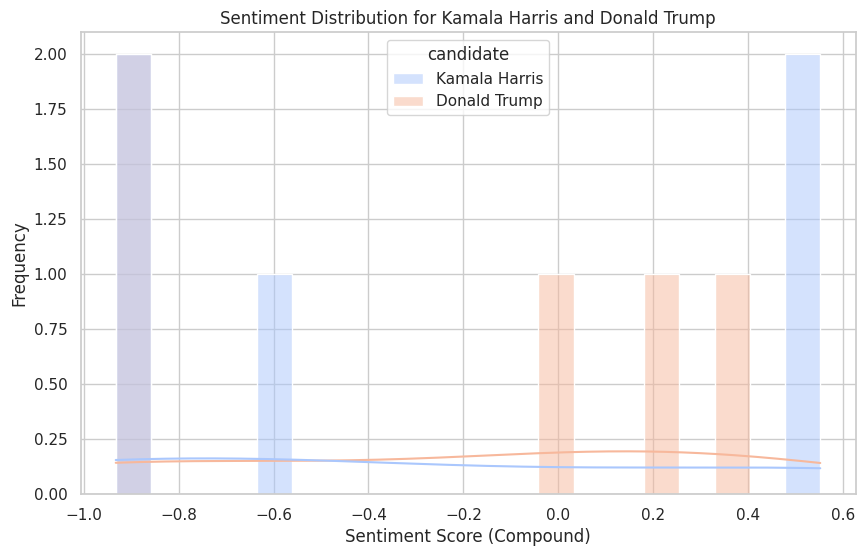

<ipython-input-19-6cffc852483a>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='candidate', y='sentiment_score', palette="coolwarm")


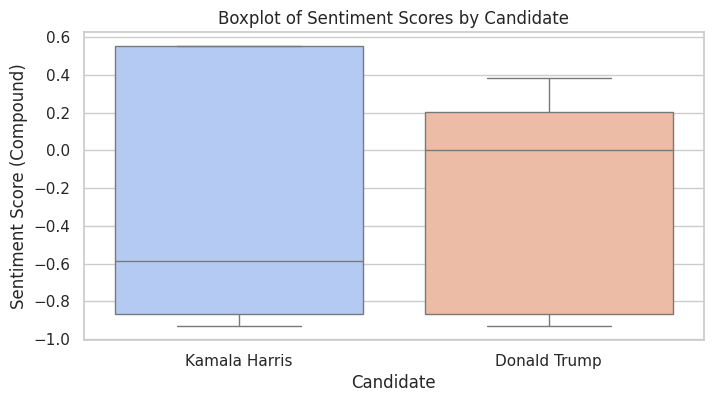

<ipython-input-19-6cffc852483a>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_data, x='candidate', y='sentiment_score', palette="coolwarm")


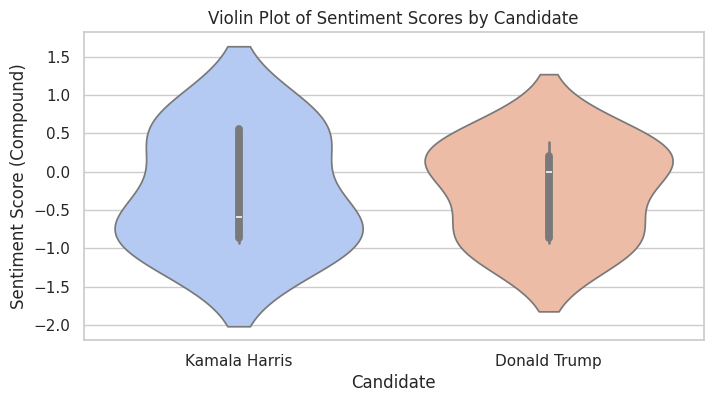

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Example data (you'll replace this with your collected news)
data = df


# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to extract sentiment scores
def get_sentiment(text):
    return analyzer.polarity_scores(text)

# Apply sentiment analysis to each news item
data['sentiment'] = data['processed_text'].apply(get_sentiment)

# Separate news mentioning Kamala Harris and Donald Trump
kamala_news = data[data['processed_text'].str.contains("Kamala Harris|Harris", case=False)]
trump_news = data[data['processed_text'].str.contains("Donald Trump|Trump", case=False)]

# Extract sentiment scores for each candidate
kamala_news['sentiment_score'] = kamala_news['sentiment'].apply(lambda x: x['compound'])
trump_news['sentiment_score'] = trump_news['sentiment'].apply(lambda x: x['compound'])

# Combine both candidates' sentiment into a single DataFrame for comparison
kamala_news['candidate'] = 'Kamala Harris'
trump_news['candidate'] = 'Donald Trump'
combined_data = pd.concat([kamala_news[['candidate', 'sentiment_score']], trump_news[['candidate', 'sentiment_score']]])

# Plotting

# Set the style for the plot
sns.set(style="whitegrid")

# Plot Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data, x='sentiment_score', hue='candidate', kde=True, bins=20, palette="coolwarm")
plt.title('Sentiment Distribution for Kamala Harris and Donald Trump')
plt.xlabel('Sentiment Score (Compound)')
plt.ylabel('Frequency')
plt.show()

# Plot Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(data=combined_data, x='candidate', y='sentiment_score', palette="coolwarm")
plt.title('Boxplot of Sentiment Scores by Candidate')
plt.xlabel('Candidate')
plt.ylabel('Sentiment Score (Compound)')
plt.show()

# Plot Violin Plot
plt.figure(figsize=(8, 4))
sns.violinplot(data=combined_data, x='candidate', y='sentiment_score', palette="coolwarm")
plt.title('Violin Plot of Sentiment Scores by Candidate')
plt.xlabel('Candidate')
plt.ylabel('Sentiment Score (Compound)')
plt.show()


In [20]:
!pip install flask

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from flask import Flask, request, jsonify



data = pd.DataFrame({
    'candidate': ['Kamala Harris', 'Donald Trump', 'Kamala Harris', 'Donald Trump'],
    'sentiment_score': [np.mean(kamala_news['sentiment_score']), np.mean(trump_news['sentiment_score']),np.mean( kamala_news['sentiment_score']), np.mean(trump_news['sentiment_score'])],
    'news_volume': [150, 200, 180, 220],
    'historical_win_rate': [0.55, 0.45, 0.6, 0.4],  # Based on previous elections/polls
    'polls': [0.58, 0.42, 0.59, 0.41],  # Polling data as a feature
    'win_percentage': [0.60, 0.40, 0.65, 0.35]  # Actual winning chances in the past
})

# Separate features (X) and target (y)
X = data[['sentiment_score', 'news_volume', 'historical_win_rate', 'polls']]
y = data['win_percentage']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)
print("Model training completed!")

# Make separate predictions for each candidate
def predict_winning_chances(candidate_data, candidate_name):
    # Predict the winning chance percentage
    winning_chance = model.predict(candidate_data)
    print(f"Predicted Winning Chance for {candidate_name}: {winning_chance[0]*100:.2f}%")

# Candidate-specific feature data
kamala_data = pd.DataFrame({
    'sentiment_score': [0.8],   # Positive sentiment for Kamala Harris
    'news_volume': [210],       # News coverage volume
    'historical_win_rate': [0.55],  # Historical data
    'polls': [0.6]              # Polling data
})

trump_data = pd.DataFrame({
    'sentiment_score': [-0.1],  # Negative sentiment for Trump
    'news_volume': [190],       # News coverage volume
    'historical_win_rate': [0.45],  # Historical data
    'polls': [0.4]              # Polling data
})

# Predict separately for each candidate
predict_winning_chances(kamala_data, "Kamala Harris")
predict_winning_chances(trump_data, "Donald Trump")

Model training completed!
Predicted Winning Chance for Kamala Harris: 46.05%
Predicted Winning Chance for Donald Trump: 47.75%


In [22]:
!pip install flask-ngrok
!ngrok authtoken '2m7BbAx47dGp9sUpvWoUgYGDsVK_BMrK8UVMUYgPE1BNkRg'

/bin/bash: line 1: ngrok: command not found


In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
import pandas as pd

app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when the app runs

@app.route('/')
def home():
    return "Welcome to the Election Prediction App!"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)  # Get JSON data from POST request
    candidate_data = pd.DataFrame(data)  # Convert data to DataFrame
    prediction = model.predict(candidate_data)  # Make prediction using the model
    return jsonify({'winning_chance': prediction[0] * 100})  # Return JSON response

if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll